In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162991 sha256=9adfffd5d5d06c27df9b64f1d8445dfbd40411dd64657023f0d97600a77cb4b3
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import numpy as np
import pandas as pd
from surprise import SVD
from surprise import KNNBasic
import matplotlib.pyplot as plt
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print('Reading in dataset')
df = pd.read_csv("/content/drive/My Drive/Spring 24/Data Mining/movie_dataset/ratings_small.csv")
dataset = Dataset.load_from_df(df[["userId", "movieId", "rating"]], Reader())


Reading in dataset


In [12]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [17]:
PMF_scores = cross_validate(SVD(biased=False) , dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7785  0.7762  0.7843  0.7748  0.7805  0.7789  0.0033  
RMSE (testset)    1.0093  1.0056  1.0143  1.0029  1.0107  1.0086  0.0040  
Fit time          1.65    1.52    1.48    1.47    2.12    1.65    0.25    
Test time         0.35    0.11    0.21    0.13    0.19    0.20    0.09    


In [18]:
UserBased_CF_scores = cross_validate(KNNBasic(sim_options={"user_based": True}), dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7387  0.7470  0.7430  0.7422  0.7462  0.7434  0.0030  
RMSE (testset)    0.9617  0.9727  0.9653  0.9643  0.9726  0.9673  0.0045  
Fit time          0.25    0.17    0.17    0.18    0.17    0.19    0.03    
Test time         2.67    1.45    1.85    1.45    1.58    1.80    0.46    


In [19]:
ItemBased_CF_scores = cross_validate(KNNBasic(sim_options={"user_based": False}), dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7228  0.7172  0.7212  0.7234  0.7197  0.7209  0.0022  
RMSE (testset)    0.9379  0.9295  0.9365  0.9372  0.9354  0.9353  0.0030  
Fit time          5.98    4.12    3.94    3.92    3.90    4.37    0.81    
Test time         8.18    8.45    8.72    8.55    8.78    8.54    0.21    


In [20]:
similarityMetrics = ["cosine", "MSD", "pearson"]

In [21]:
userBased_CF_scores = []
print('User Based CF methods...')

for idx in range(3):
  cv_scores = cross_validate(KNNBasic(sim_options={"name": similarityMetrics[idx], "user_based": True}), dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)
  print()
  userBased_CF_scores.append([np.mean(cv_scores["test_rmse"]), np.mean(cv_scores["test_mae"])])

userBased_CF_scores_np = np.array(userBased_CF_scores)

User Based CF methods...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7692  0.7657  0.7714  0.7689  0.7646  0.7680  0.0025  
RMSE (testset)    0.9982  0.9909  0.9995  0.9962  0.9858  0.9941  0.0051  
Fit time          0.20    0.38    0.23    0.21    0.22    0.25    0.06    
Test time         1.47    2.49    1.53    1.45    1.51    1.69    0.40    

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the 

In [22]:
itemBased_CF_scores = []
print('Item Based CF methods...')

for idx in range(3):
  cv_scores = cross_validate(KNNBasic(sim_options={"name": similarityMetrics[idx], "user_based": False}), dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)
  print()
  itemBased_CF_scores.append([np.mean(cv_scores["test_rmse"]), np.mean(cv_scores["test_mae"])])

itemBased_CF_scores_np = np.array(itemBased_CF_scores)

Item Based CF methods...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7714  0.7719  0.7774  0.7793  0.7746  0.7749  0.0031  
RMSE (testset)    0.9905  0.9912  0.9974  1.0028  0.9944  0.9953  0.0045  
Fit time          8.23    6.38    11.96   6.75    6.13    7.89    2.16    
Test time         7.85    12.13   8.16    8.21    8.28    8.92    1.61    

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the 

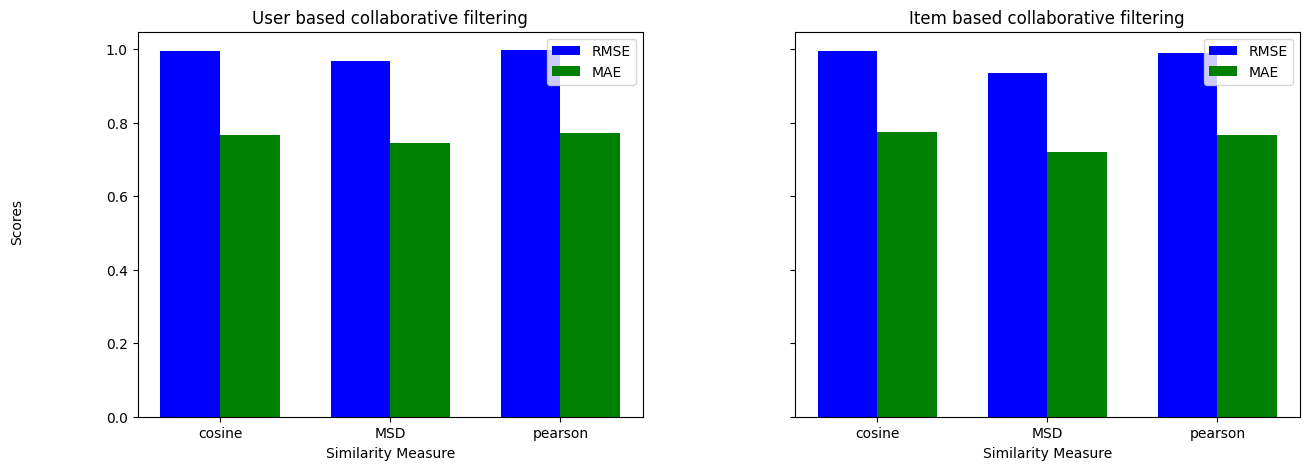

In [23]:
n_groups = 3
bar_width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

index = np.arange(n_groups)
user_bar1 = ax[0].bar(index, userBased_CF_scores_np[:, 0], bar_width, label='RMSE', color='blue')
user_bar2 = ax[0].bar(index + bar_width, userBased_CF_scores_np[:, 1], bar_width, label='MAE', color='green')

ax[0].set_xlabel('Similarity Measure')
ax[0].set_title('User based collaborative filtering')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(['cosine', 'MSD', 'pearson'])
ax[0].legend()

item_bar1 = ax[1].bar(index, itemBased_CF_scores_np[:, 0], bar_width, label='RMSE', color='blue')
item_bar2 = ax[1].bar(index + bar_width, itemBased_CF_scores_np[:, 1], bar_width, label='MAE', color='green')

ax[1].set_xlabel('Similarity Measure')
ax[1].set_title('Item based collaborative filtering')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(['cosine', 'MSD', 'pearson'])
ax[1].legend()

fig.text(0.04, 0.5, 'Scores', va='center', rotation='vertical')
plt.subplots_adjust(wspace=0.3)

plt.show()

In [8]:
userBased_CF_scores = []
for neighbors in range(1, 111, 10):
    cv_scores = cross_validate(KNNBasic(k=neighbors, sim_options={"user_based": True}), dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)
    userBased_CF_scores.append([np.mean(cv_scores["test_rmse"]), np.mean(cv_scores["test_mae"])])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2133  1.2142  1.2129  1.2050  1.1994  1.2089  0.0058  
MAE (testset)     0.9046  0.9028  0.9055  0.8996  0.8932  0.9011  0.0045  
Fit time          0.16    0.21    0.16    0.16    0.29    0.20    0.05    
Test time         1.41    1.49    1.62    0.96    1.57    1.41    0.24    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [9]:
itemBased_CF_scores = []
for neighbors in range(1, 111, 10):
    cv_scores = cross_validate(KNNBasic(k=neighbors, sim_options={"user_based": False}), dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)
    itemBased_CF_scores.append([np.mean(cv_scores["test_rmse"]), np.mean(cv_scores["test_mae"])])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3018  1.2997  1.2989  1.3101  1.3002  1.3021  0.0041  
MAE (testset)     0.9629  0.9592  0.9620  0.9724  0.9624  0.9638  0.0045  
Fit time          5.39    4.74    4.26    4.46    4.72    4.72    0.38    
Test time         6.12    6.21    5.65    5.04    5.83    5.77    0.42    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

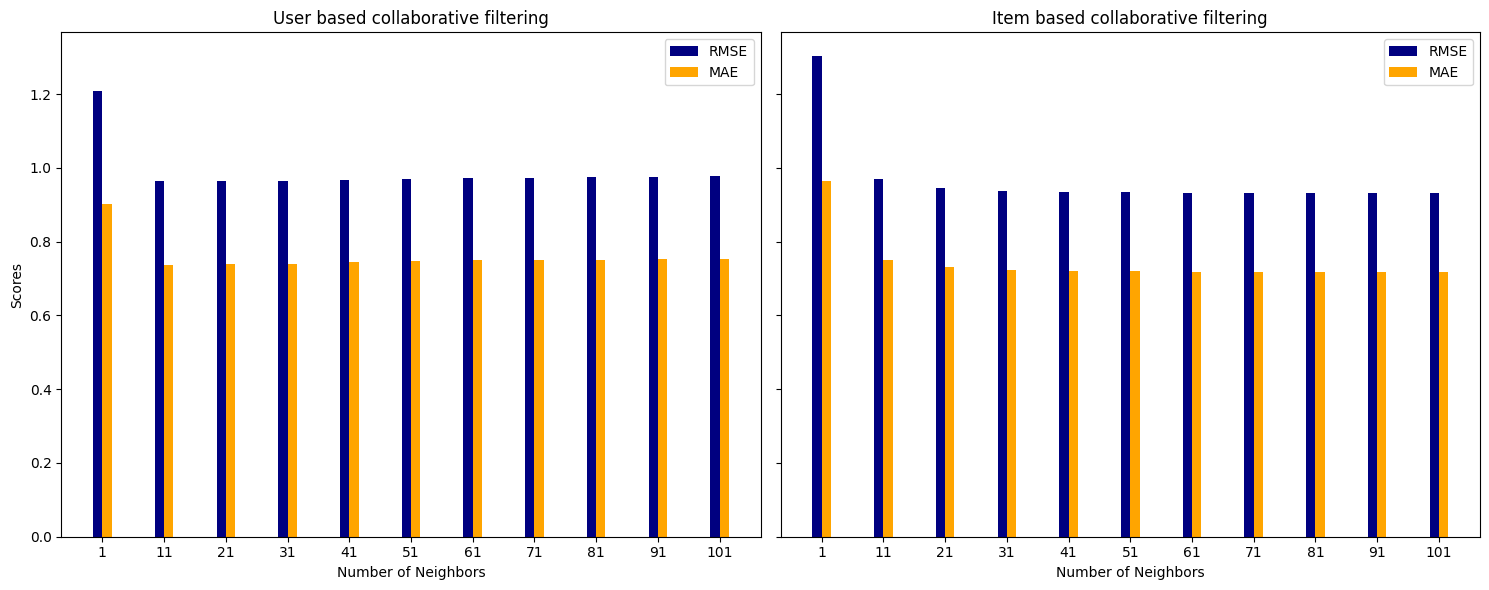

In [10]:
itemBased_CF_scores_np = np.array(itemBased_CF_scores)
userBased_CF_scores_np = np.array(userBased_CF_scores)
neighbor_counts = np.array([i for i in range(1, 111, 10)])


rmse_user = userBased_CF_scores_np[:, 0]
mae_user = userBased_CF_scores_np[:, 1]

rmse_item = itemBased_CF_scores_np[:, 0]
mae_item = itemBased_CF_scores_np[:, 1]

bar_width = 1.5

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

axes[0].bar(neighbor_counts - bar_width/2, rmse_user, bar_width, label='RMSE', color='navy')
axes[0].bar(neighbor_counts + bar_width/2, mae_user, bar_width, label='MAE', color='orange')
axes[0].set_title('User based collaborative filtering')
axes[0].set_xlabel('Number of Neighbors')
axes[0].set_ylabel('Scores')
axes[0].set_xticks(neighbor_counts)
axes[0].legend()

axes[1].bar(neighbor_counts - bar_width/2, rmse_item, bar_width, label='RMSE', color='navy')
axes[1].bar(neighbor_counts + bar_width/2, mae_item, bar_width, label='MAE', color='orange')
axes[1].set_title('Item based collaborative filtering')
axes[1].set_xlabel('Number of Neighbors')
axes[1].set_xticks(neighbor_counts)
axes[1].legend()

plt.tight_layout()
plt.show()
